# 5202 Assignment 1

## Part A: Analysing Text Data

### Step 01: Import pyspark and initialize Spark

In [1]:
# Initialising pyspark by creating entry points to spark
from pyspark import SparkContext, SparkConf 
from pyspark.sql import SparkSession

# Importing regular expression package
import re

In [2]:
# Checking for existing spark context before creating a new one
sc = SparkContext.getOrCreate()

# Create a new spark context if there is no pre-existing spark context with required specifications about logical cores and application name
if (sc is None):                      
    sc = SparkContext(master="local[*]", appName="5202 Ass 1 Part A")
spark = SparkSession(sparkContext=sc)

### Step 02: Create Resilient Distributed Datasets (RDDs)
### Write the code in pyspark to read the required dataset and display the total number of lines in each dataset.

In [3]:
# Reading both the input dataset to convert them into RDDs
rdd_agile = sc.textFile('Agile Processes  in Software Engineering  and Extreme Programming.txt')
rdd_scrum = sc.textFile('Scrum Handbook.txt')

In [4]:
# Counting the number of lines in each dataset. Each line of dataset is an element in RDD
agile_count = rdd_agile.count()
scrum_count = rdd_scrum.count() 

# Printing the number of lines in each dataset
print('The total number of lines in "Agile Processes in Software Engineering and Extreme Programming.txt" and "Scrum Handbook.txt" are',\
     agile_count, 'and', scrum_count, 'respectively.')

The total number of lines in "Agile Processes in Software Engineering and Extreme Programming.txt" and "Scrum Handbook.txt" are 21569 and 4617 respectively.


### Step 03: Cleaning/Manipulating text.
### Write a function that performs the following tasks on the RDDs:
    1. Removes all characters which are not alphabets except space(s).
    2. Changes all upper case letters to lowercase..
    3. Removes all leading or trailing spaces.

In [5]:
# Defining a function which performs cleaning and manipulation of text
def clean_data(x):
    line=re.sub(r'[^A-Za-z ]','', x)  # Using regular expression to remove non-alphabets except spaces
    line = line.lower().strip()       # Coverting alphabets to lowercase and removing leading and trailing spaces in each line
    return line

# Using map functions to transform each elements of the RDD
cleaned_rdd_agile = rdd_agile.map(clean_data)
cleaned_rdd_scrum = rdd_scrum.map(clean_data)

# Printing the contents of agile rdd_agile as a list after cleaning
print('The contents of rdd_agile after cleaning are :\n', cleaned_rdd_agile.collect())

The contents of rdd_agile after cleaning are :
 ['lnbip', '', '', 'i helen sharp', '', 'tracy hall eds', '', 'agile processes', 'in software engineering', 'and extreme programming', '', 'th international conference xp', 'edinburgh uk may', 'proceedings', '', '', 'springer open', '', '', '', '', '', '', '', 'lecture notes', '', 'in business information processing', '', '', 'series editors', '', 'wil van der aalst', '', 'eindhoven technical university eindhoven the netherlands', 'john mylopoulos', '', 'university of trento povo italy', 'michael rosemann', '', 'queensland university of technology brisbane qld australia', 'michael j shaw', '', 'university of illinois urbanachampaign il usa', 'clemens szyperski', '', 'microsoft research redmond wa usa', '', '', '', 'more information about this series at httpwwwspringercomseries', '', '', '', 'helen sharp  tracy hall eds', '', '', 'agile processes', 'in software engineering', 'and extreme programming', '', 'th international conference xp', '

In [6]:
# Printing the contents of rdd_scrum as a list after cleaning
print('The contents of rdd_scrum after cleaning are :\n', cleaned_rdd_scrum.collect())


The contents of rdd_scrum after cleaning are :
 ['jeff sutherlands', '', 'scrum handbook', '', '', '', '', 'everything', 'you need', 'to know', 'to start', '', 'a scrum project', 'in your', 'organization', '', 'scrum', '', 'training', '', 'institute', '', 'm w press', '', '', '', 'this book is dedicated to nobel laureate muhammad yunus and the', 'grameen bank for originating microenterprise development and the', 'accion international presidents advisory board responsible for much of', 'microenterprise development in the western hemisphere', '', 'the strategy for bootstrapping the poor out of poverty has been', 'a model for freeing hundreds of thousands of software developers from', 'developer abuse caused by poor management practices', '', 'thanks to the reviewers of the text who include among many others', '', 'tom poppendieck', '', 'hen rick kniberg', '', 'rowan bunning', '', 'clifford thompson', '', '', '', 'about this book', '', 'this manual is based on the scrum papers published b

### Step 04: Transforming the Data/Counting the words
### Apply a transformation that will split each element of the RDD by its spaces and then create a word pairs for e.g. ('agile', 1), ('handbook', 1). Then, count the frequency of each word and display the top 20 most frequent words.

In [7]:
# Applying transformation on cleaned_rdd_agile:
# Splitting each element of RDD by its spaces
# Filtering all element by removing blanks and spaces to get only words
# Creating word pairs
# Reducing the word pairs by key and adding their values to get the frequency of each word
# Sorting the key value pairs by their values in descending order

rdd_agile_word_count=cleaned_rdd_agile.flatMap(lambda line: line.split(' ')) \
                                      .filter(lambda x: x != '' and x != ' ') \
                                      .map(lambda word: (word, 1)) \
                                      .reduceByKey(lambda a, b: a + b) \
                                      .sortBy(lambda each: each[1], ascending=False) 

# Similarly applying transformation on cleaned_rdd_agile 
rdd_scrum_word_count = cleaned_rdd_scrum.flatMap(lambda line: line.split(' ')) \
                                        .filter(lambda x: x != '' and x != ' ') \
                                        .map(lambda word: (word, 1)) \
                                        .reduceByKey(lambda a, b: a + b) \
                                        .sortBy(lambda each: each[1], ascending=False)

In [8]:
# Printing the top 20 frequent words 
print('The top 20 most frequent words in rdd_agile are:\n\n', rdd_agile_word_count.take(20))

The top 20 most frequent words in rdd_agile are:

 [('the', 8145), ('and', 3965), ('of', 3944), ('to', 3714), ('in', 3076), ('a', 2701), ('is', 1539), ('that', 1355), ('for', 1194), ('as', 1028), ('on', 1015), ('we', 975), ('with', 969), ('software', 922), ('this', 915), ('are', 784), ('agile', 748), ('it', 741), ('development', 737), ('was', 711)]


In [9]:
# Printing the top 20 frequent words 
print('The top 20 most frequent words in rdd_agile are:\n\n',rdd_scrum_word_count.take(20))

The top 20 most frequent words in rdd_agile are:

 [('the', 1238), ('of', 537), ('and', 534), ('to', 477), ('a', 451), ('scrum', 395), ('in', 360), ('is', 348), ('team', 260), ('product', 232), ('for', 195), ('that', 181), ('it', 165), ('on', 149), ('sprint', 146), ('this', 142), ('with', 132), ('as', 124), ('are', 119), ('by', 118)]


### Step 05: Removing Stop Words
### Write the code to remove stop words from the RDDs. You should use nltk package to remove the stop words. Also find how many unique words do we now have in each RDD?

In [10]:
# Importing nltk package and stopwords and setting the language as 'english'
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

# Filtering out the words which do not belong to english stopwords from both RDDs
new_agile_rdd = rdd_agile_word_count.filter(lambda word : word[0] not in stopwords)
new_scrum_rdd = rdd_scrum_word_count.filter(lambda word : word[0] not in stopwords)

# Printing the count of unique words from both RDDs
print('The number of unique words in rdd_agile is:\n',new_agile_rdd.count())
print('The number of unique words in rdd_scrum is:\n',new_scrum_rdd.count())

The number of unique words in rdd_agile is:
 9611
The number of unique words in rdd_scrum is:
 2936


### Step 06: Find the average occurrence of a word
### Write the code to find the average occurrences of the words.

In [11]:
# For loop to count the total number of words by adding the frequencies of all the words except stopwords
total_word_agile = 0                         # Initializing a counter
for word in rdd_agile_word_count.collect() : # Parsing through all the elements of RDD 
    if word[0] not in stopwords :            # Adding all frequencies only if word is not a stopword  
        total_word_agile = total_word_agile + word[1]
    else :
        continue
        
print('Average occurences of words in rdd_agile =', total_word_agile/new_agile_rdd.count())

Average occurences of words in rdd_agile = 8.225574862137135


In [12]:
# For loop to count the total number of words by adding the frequencies of all the words except stopwords
total_word_scrum = 0
for word in rdd_scrum_word_count.collect() :
    if word[0] not in stopwords :
        total_word_scrum = total_word_scrum + word[1]
    else :
        continue
        
print('Average occurences of words in rdd_scrum =', total_word_scrum/new_scrum_rdd.count())

Average occurences of words in rdd_scrum = 3.681880108991826


### Step 7: Exploratory data analysis

In [13]:
# Importing libraries
#!pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### - Compare the distribution of words in Book1 and Book2 The data spans many orders of magnitude and the features of the distribution not quite evident in the linear space. Therefore, use log scale (base 10) to plot the graph. Explain your understanding based on the graphs.

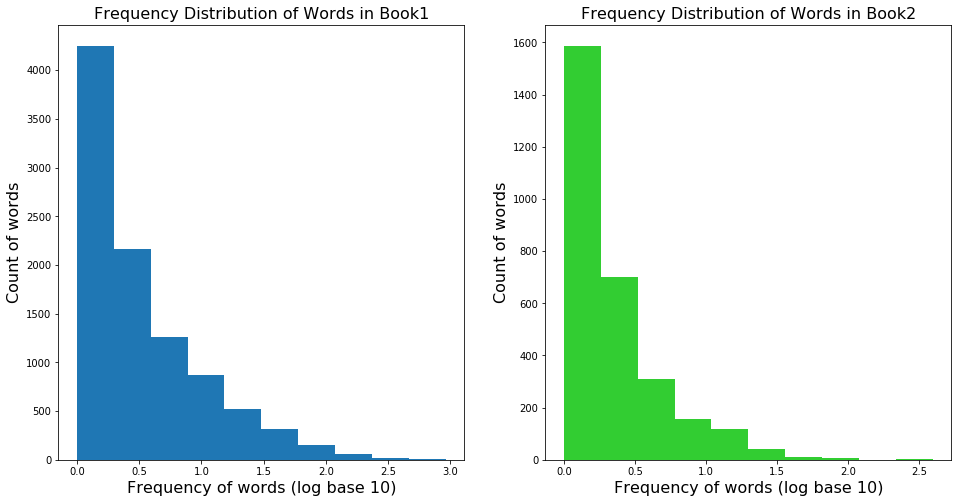

In [14]:
# Plotting histogram of distribution of the words in each dataset as a subplot, using log scale

plt.figure(figsize=(16,8))   # Initializing figure with specific dimensions

# Subplot 1 for Book1
plt.subplot(1,2,1)
plt.hist(np.log10(np.array(new_agile_rdd.values().collect())))
plt.title('Frequency Distribution of Words in Book1', fontsize=16)
plt.xlabel('Frequency of words (log base 10)', fontsize=16)
plt.ylabel('Count of words', fontsize=16)

# Subplot 2 for Book2
plt.subplot(1,2,2)
plt.hist(np.log10(np.array(new_scrum_rdd.values().collect())), color='limegreen')

plt.title('Frequency Distribution of Words in Book2', fontsize=16)
plt.xlabel('Frequency of words (log base 10)', fontsize=16)
plt.ylabel('Count of words', fontsize=16)

plt.show()

### Interpretation of the above plots :
* The above 2 distributions depict the frequency distribution of words in both the books. X-axis represent the log of the frequency of the words in a book and Y-axis represent the count of words with a particular frequency.
* From the above plots we can see that distribution of words in both the books are skewed right. But the distribution in Book1 is more skewed towards right compared to the distribution in Book2. Maximum frequency of word is higher for Book1 than Book2 i.e. frequency spread is more for Book1 than Book2. 
* Moreover, most of the words in both the books have frequency less than 10



### - Compare the top 15 most common words in Book1 and Book2. Plot the graphs and explain your understanding of the graph.

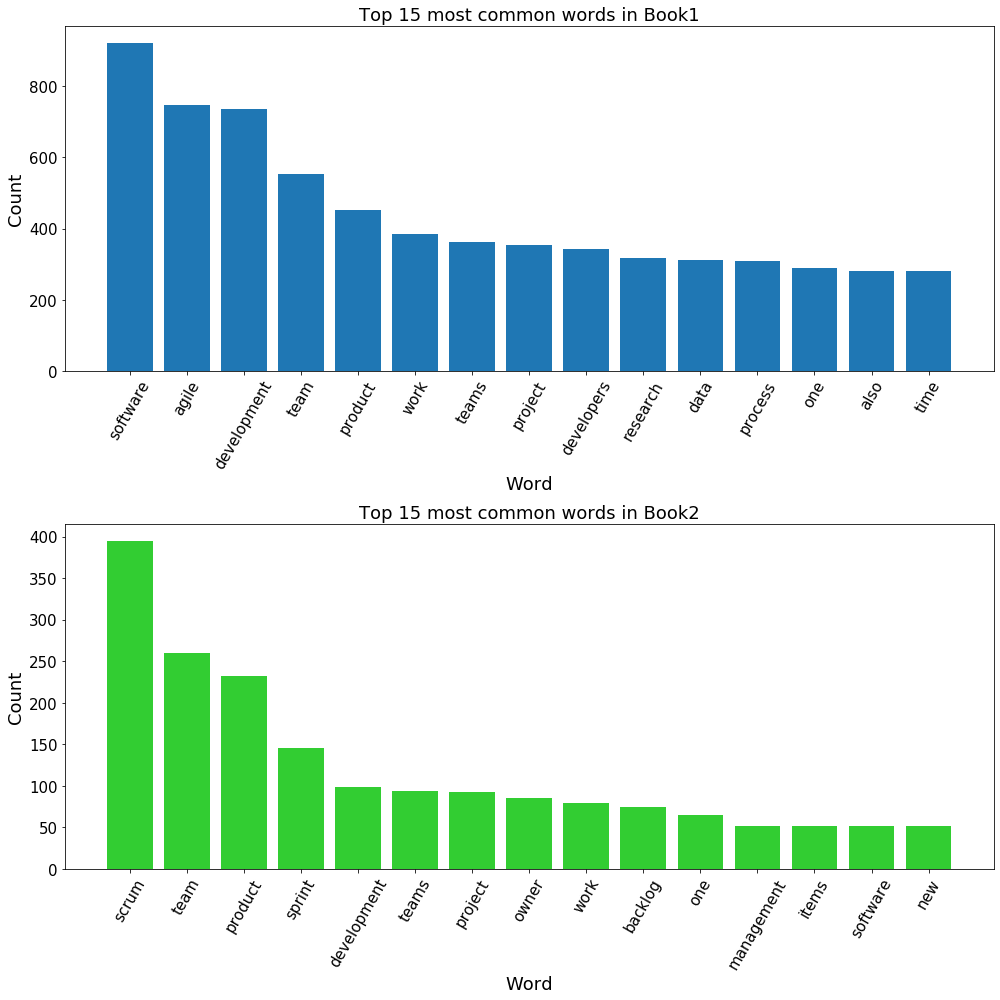

In [15]:
book1_words = new_agile_rdd.map(lambda x: x[0]).collect()[0:15]
book1_count = new_agile_rdd.map(lambda x: x[1]).collect()[0:15]

book2_words = new_scrum_rdd.map(lambda x: x[0]).collect()[0:15]
book2_count = new_scrum_rdd.map(lambda x: x[1]).collect()[0:15]

plt.figure(figsize=(14,14))# Initializing figure with specific dimensions
plt.subplot(2,1,1)
plt.bar(book1_words, book1_count, label='Book1')
plt.title('Top 15 most common words in Book1', fontsize=18)
plt.xlabel('Word', fontsize=18)
plt.xticks(fontsize=15, rotation =60)
plt.yticks(fontsize=15)
plt.ylabel('Count', fontsize=18)

plt.subplot(2,1,2)
plt.bar(book2_words, book2_count, label='Book2', color='limegreen')
plt.title('Top 15 most common words in Book2', fontsize=18)
plt.xlabel('Word', fontsize=18)
plt.xticks(fontsize=15, rotation =60)
plt.yticks(fontsize=15)
plt.ylabel('Count', fontsize=18)


plt.tight_layout()

plt.show()

#### Interpretation of the above plot :
* The most common word in Book1 is `software` which is the 14th most common word in Book2. Whereas the most common word in Book2 is `scrum` which is the title of the book.

* From the visualization above we can conclude that Book1 is more related to `software` and its `development`. Whereas the Book2 is more related to `team` and `product`.